In [ ]:
## Import dependancies
!pip install contractions
import string,re,contractions
import unicodedata
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import nltk

     |████████████████████████████████| 327kB 25.9MB/s 
     |████████████████████████████████| 266kB 16.9MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85390 sha256=d5f6990973ec3d07205a0c938d810801affcb4b898118d85c8c6c57eec8771d0
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/My Drive/Tweets.csv')

In [ ]:
df=df[['airline_sentiment','text']]
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [ ]:
pd.set_option('display.max_colwidth',None)
df.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [ ]:
## Removal of html tags
def strip_html(text):
  soup=BeautifulSoup(text,'html.parser')
  return soup.get_text()
df['text']=df['text'].apply(lambda x:strip_html(x))

In [ ]:
## Remove contractions
def replace_contractions(text):
  return contractions.fix(text)
df['text']=df['text'].apply(lambda x:replace_contractions(x))
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [ ]:
## remove numbers
def remove_numbers(text):
  text=re.sub(r'\d+','',text)
  return text
df['text']=df['text'].apply(lambda x:remove_numbers(x))
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [ ]:
## tokenize the text
df['text']=df.apply(lambda row:nltk.word_tokenize(row['text']),axis=1)
df.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


In [ ]:
## removal of stopwords
stopwords=stopwords.words('english')

In [ ]:
custom_list=['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
stopWords=list(set(stopwords)-set(custom_list))

In [ ]:
def remove_stopwords(words):
  new_words=[]
  for word in words:
    if word not in stopWords:
      new_words.append(word)
  return new_words

In [ ]:
df['text']=df.apply(lambda row:remove_stopwords(row['text']),axis=1)
df.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, added, commercials, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, not, today, ..., Must, mean, I, need, take, another, trip, !]"
3,negative,"[@, VirginAmerica, really, aggressive, blast, obnoxious, ``, entertainment, '', guests, ', faces, &, little, recourse]"
4,negative,"[@, VirginAmerica, really, big, bad, thing]"


In [ ]:
## remove non-ascii characters
def remove_non_ascii(words):
  new_words=[]
  for word in words:

    new_word=unicodedata.normalize('NFKD',word).encode('ascii','ignore').decode('utf-8','ignore')
    new_words.append(new_word)
  return new_words
df['text']=df.apply(lambda row:remove_non_ascii(row['text']),axis=1)
df.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, added, commercials, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, not, today, ..., Must, mean, I, need, take, another, trip, !]"
3,negative,"[@, VirginAmerica, really, aggressive, blast, obnoxious, ``, entertainment, '', guests, ', faces, &, little, recourse]"
4,negative,"[@, VirginAmerica, really, big, bad, thing]"


In [ ]:
## to lowercase

def to_lower(words):
  new_words=[]
  for word in words:
    new_word=word.lower()
    new_words.append(new_word)
  return new_words

In [ ]:

def remove_punctuation(words):
  new_words=[]
  for word in words:
    new_word=re.sub(r'[^\w\s]','',word)
    if new_word != '':
      new_words.append(new_word)
  return new_words

In [ ]:
new_words=[]
lemmatizer=WordNetLemmatizer()
def lemma(words):
  new_words=[]
  for word in words:
    new_word=lemmatizer.lemmatize(word,pos='v')
    new_words.append(word)
  return new_words

In [ ]:
df.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, added, commercials, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, not, today, ..., Must, mean, I, need, take, another, trip, !]"
3,negative,"[@, VirginAmerica, really, aggressive, blast, obnoxious, ``, entertainment, '', guests, ', faces, &, little, recourse]"
4,negative,"[@, VirginAmerica, really, big, bad, thing]"


In [ ]:
def normalise(words):
    words=to_lower(words)
    words=remove_punctuation(words)
    words=lemma(words)
    return ' '.join(words)
df['text']=df.apply(lambda row :normalise(row['text']),axis=1)
df.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn said
1,positive,virginamerica plus added commercials experience tacky
2,neutral,virginamerica i not today must mean i need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests faces little recourse
4,negative,virginamerica really big bad thing


## Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(max_features=1000)
features=vectorizer.fit_transform(df['text'])
features=features.toarray()

In [ ]:
features.shape

(14640, 1000)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['airline_sentiment']=encoder.fit_transform(df['airline_sentiment'])
df.head()

,airline_sentiment,text
0,1,virginamerica what dhepburn said
1,2,virginamerica plus added commercials experience tacky
2,1,virginamerica i not today must mean i need take another trip
3,0,virginamerica really aggressive blast obnoxious entertainment guests faces little recourse
4,0,virginamerica really big bad thing


In [ ]:
labels=df['airline_sentiment']
labels=labels.astype('int')

In [ ]:
## Split data  into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(features,labels,test_size=0.3,random_state=42)


In [ ]:
## Using Random forest to build classification Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
Classifier=RandomForestClassifier(n_estimators=10,n_jobs=4)
Classifier=Classifier.fit(X_train,y_train)
print('Cross Val Score with Count Vectorizer technique:{}'.format(np.mean(cross_val_score(Classifier,features,labels,cv=10))))

Cross Val Score with Count Vectorizer tehnique:0.7033469945355192


In [ ]:
## predict the results of the test data
y_pred=Classifier.predict(X_test)

[[2461  259   94]
 [ 368  416  100]
 [ 168  122  404]]


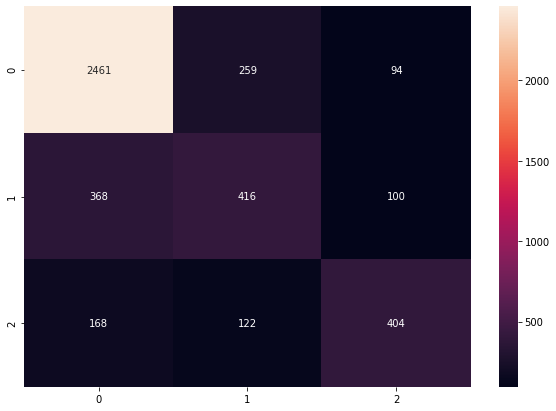

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
df_cm=pd.DataFrame(conf_mat,index=[i for i in "012"],columns=[i for i in "012"])
plt.figure(figsize=(10,7))
sns.heatmap(df_cm,annot=True,fmt='g')

In [ ]:
## using tfidf vectorizer to convert data into numbers
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=1000)
features=vectorizer.fit_transform(df['text'])
features=features.toarray()
features.shape

(14640, 1000)

In [ ]:
## Build a Random Forest Classifier
## Calculate the cros val score fo the model
labels=df['airline_sentiment'].astype('int')
df.head()

,airline_sentiment,text
0,1,virginamerica what dhepburn said
1,2,virginamerica plus added commercials experience tacky
2,1,virginamerica i not today must mean i need take another trip
3,0,virginamerica really aggressive blast obnoxious entertainment guests faces little recourse
4,0,virginamerica really big bad thing


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.3,random_state=40)
print(X_train.shape)
print(y_train.shape)

(10248, 1000)
(10248,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
Classifier=RandomForestClassifier(n_estimators=10,n_jobs=4)
Classifier=Classifier.fit(X_train,y_train)
print(Classifier)
print("Cross Val score with Tfidf technique:{}".format(np.mean(cross_val_score(Classifier,features,labels,cv=10))))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
Cross Val score with Tfidf technique:0.7092896174863388


[[2534  172   75]
 [ 492  376   81]
 [ 208  107  347]]


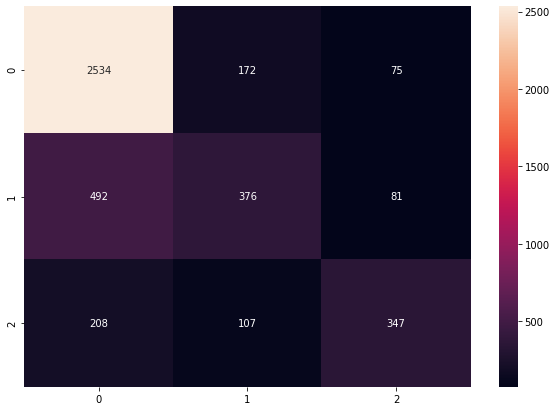

In [ ]:
## Evaluate the model built using tfidf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred=Classifier.predict(X_test)

conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
df_cm=pd.DataFrame(conf_mat,index=[i for i in "012"],columns=[i for i in "012"])
plt.figure(figsize=(10,7))
sns.heatmap(df_cm,annot=True,fmt='g')

### Summary


*   We used a dataset which has tweets in text format and their sentiments classified as positive,negative and neutral
*   The goal was to build a model for Text Classification
*   PreProcessed the data using various techniques and libraries
*   The processed unstructured data is converted into numbers, so as to be fed into the model
*   After building the Classification model, We predicted the results for Test data
*   Based on our Cross Validation Score, the model built using the Tfidf method performed better with score 70.9%
*   However. We can still increase the accuracy of our model by increasing the dataset we took into account for model building
*   Another way to improve the accuracy is to use different variations in PreProcessing methods.

